# STEP1：データの準備

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
# データの説明
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

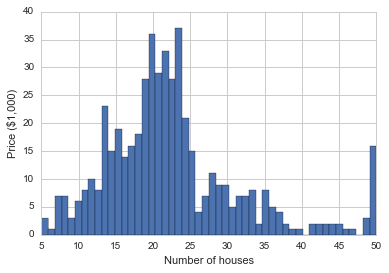

In [5]:
# データの概要を見る
plt.hist(boston.target, bins=50)
plt.ylabel('Price ($1,000)')
plt.xlabel('Number of houses')

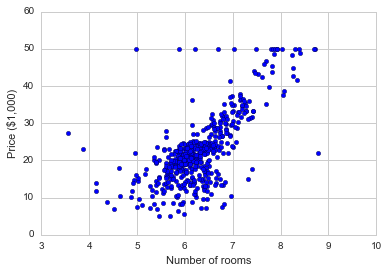

In [6]:
plt.scatter(boston.data[:,5], boston.target)
plt.ylabel('Price ($1,000)')
plt.xlabel('Number of rooms')

In [7]:
# DataFrameにする
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


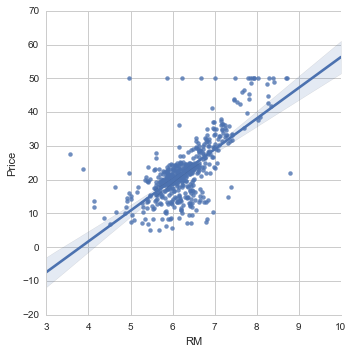

In [11]:
sns.lmplot('RM', 'Price', data=boston_df)

In [12]:
x = boston_df.RM
x.shape

(506,)

In [13]:
x = np.vstack(x)

In [14]:
x.shape

(506, 1)

In [22]:
y = boston_df.Price

In [23]:
x = np.array([ [value, 1] for value in x])

In [17]:
x

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [24]:
# numpyを使った線形回帰
a,b = np.linalg.lstsq(x, y)[0]

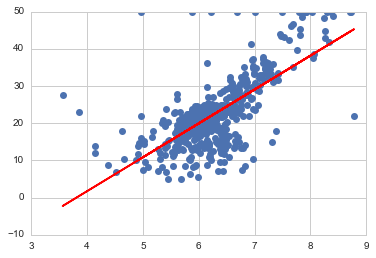

In [19]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM
plt.plot(x, a*x + b, 'r')

In [25]:
result = np.linalg.lstsq(x, y)

In [29]:
error_total = result[1]
rmse = np.sqrt(error_total/len(x))

In [34]:
rmse

array([ 6.60307139])

In [38]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60


## 重回帰

In [40]:
import sklearn
from sklearn.linear_model import LinearRegression

In [41]:
lreg = LinearRegression()

In [45]:
x_multi = boston_df.drop('Price', axis=1)

In [46]:
x_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
y_target = boston_df.Price

In [48]:
lreg.fit(x_multi, y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
lreg.intercept_

36.491103280363404

In [53]:
len(lreg.coef_)

13

In [59]:
coeff_df = DataFrame(boston_df.columns)

In [61]:
coeff_df.columns = ['Features']

In [62]:
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

In [63]:
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [64]:
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x_multi, boston_df.Price)

In [65]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [66]:
lreg = LinearRegression()

In [67]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
pred_train = lreg.predict(x_train)

In [70]:
pred_test = lreg.predict(x_test)

In [71]:
np.mean((y_train - pred_train) ** 2)

18.900084117742097

In [73]:
np.mean((y_test - pred_test) ** 2)

34.585416150926015

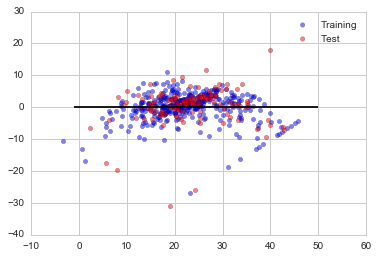

In [78]:
train = plt.scatter(pred_train, (pred_train - y_train), c='b', alpha=0.5)
test  = plt.scatter(pred_test, (pred_test - y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-1.0, xmax=50)
plt.legend((train, test), ('Training', 'Test'))